<a href="https://colab.research.google.com/github/DibyaSadhukhan/Amazon_Review_Analysis/blob/main/Product_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing required packages
import pandas as pd

#Extracts the recommended products

In [ ]:
data = pd.read_csv('Products.csv')
data=data.drop(data.columns[0], axis=1)
data=data.nlargest(5,['number_of_reveiws','Rating'])
data.head(10)
data.to_csv('Top_products.csv')

In [ ]:
"""
data=data.nlargest(5,['number_of_reveiws','Rating'])
data.head(10)
data.to_csv('Top_products.csv')
"""

#Extracts the products for the first page 

In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/Laptop_Reveiw/Data/Master_reveiw_2021-11-06.csv')
#changing the data type of rating column 
df = df.rename(columns={'number of reveiws': 'number_of_reveiws'})
df['Rating']=df['Rating'].apply(lambda x : float(x.split(' ')[0]))
df=df.drop(df.columns[[0,-1,-2,-3]], axis=1)
#removing duplicate products
#df.loc[df['Product_code']=='B08SML9W2R']
df=df.drop_duplicates(subset=['Product_code','number_of_reveiws'], keep='first')
#print(df['Product_code'].value_counts())
f = lambda x: x.split(' ')[1] if x.startswith('(Renewed)') or x.startswith('2020') or x.startswith('Newest')  else x.split(' ')[0]
df['Brand'] = df['Product_name'].map(f)
df['number_of_reveiws']=df['number_of_reveiws'].astype(int)
df['Brand']=df['Brand'].apply(lambda x : x.upper())
df['Price']=df['Price'].str.replace(',', '')
df['Price']=df['Price'].str.replace('₹', '')
df['Price']=df['Price'].astype(int)
#df['Renewed'] = list(map(lambda x: x.startswith('(Renewed)'), df['Product_name'])) 
#df['Brand'].value_counts()

df.to_csv('Products.csv')
print(len(df))
df.head()


189


,Product_code,Product_name,Rating,number_of_reveiws,Price,Images,Link,Brand
0,B08CKY5XX3,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...",4.1,659,27639,https://m.media-amazon.com/images/I/71S8U9VzLT...,https://www.amazon.in/ASUS-VivoBook-Integrated...,ASUS
1,B095YC11CF,HP 15 10th Gen Intel Core i3 Thin and Light 15...,3.8,1511,40990,https://m.media-amazon.com/images/I/81Ne5qKmE8...,https://www.amazon.in/HP-inches-Laptop-Windows...,HP
2,B08X4N3DW2,"Dell Inspiron 3502 15.6"" (39.62 cms) HD Displa...",4.2,276,44125,https://m.media-amazon.com/images/I/51jPUwqQTF...,https://www.amazon.in/Dell-Inspiron-Integrated...,DELL
3,B09G9ZPV38,Lenovo IdeaPad Slim 1 Intel Celeron N4020 11.6...,3.8,92,25990,https://m.media-amazon.com/images/I/61km1VkaCs...,https://www.amazon.in/Lenovo-IdeaPad-Celeron-P...,LENOVO
4,B0928NL6F3,HP 14 11th Gen Intel Core i5 Processor 14 inch...,4.1,417,57990,https://m.media-amazon.com/images/I/71bJqS8ZLT...,https://www.amazon.in/HP-Processor-Windows-Nat...,HP


In [ ]:
df = pd.read_csv('Products.csv')
df.head()

,Unnamed: 0,Product_code,Product_name,Rating,number_of_reveiws,Price,Images,Brand
0,0,B097RKZYGS,"ASUS VivoBook 14 (2020), 14-inch (35.56 cms) F...",3.9,156,31990,https://m.media-amazon.com/images/I/716bvqzz7P...,ASUS
1,1,B08C5W6PL2,HP Chromebook 14-inch (35.56 cms) Thin & Light...,3.9,766,25999,https://m.media-amazon.com/images/I/613WULNEr1...,HP
2,2,B08HJYFZ14,"HP 15 AMD Athlon 15.6"" (39.62cms) HD Laptop (S...",3.5,483,25999,https://m.media-amazon.com/images/I/61bkuSlKF4...,HP
3,3,B08HJZHTM1,HP 15 Intel Pentium Gold 6405U Processor Entry...,3.4,843,25999,https://m.media-amazon.com/images/I/71FB8qoB78...,HP
4,4,B0924PSV78,RDP ThinBook 1010 - Intel Celeron Quad Core Pr...,3.4,258,19990,https://m.media-amazon.com/images/I/51C6EHkMQp...,RDP


In [ ]:
#test
"""
df['Price']=df['Price'].str.replace(',', '')
df['Price']=df['Price'].str.replace('₹', '')
data=df
def get_data_frame(brand,ub,lb,sort):
    table = pd.DataFrame(columns = data.columns)
    if ub==-1:
        table=data.loc[data['Price']>100000]
    elif lb>0 and ub>0:
        table=data.loc[(data['Price']>lb)&(data['Price']<=ub)]
    else:
        table=data
    if brand!='Any':
        table=table.loc[table['Brand']==brand]
    if sort=='Price_A':
        table=table.nsmallest(5,['Price'])
    elif sort=='Price_D':
        table=table.nlargest(5,['Price'])
    else:
        table=table.nlargest(5,[sort])
    return table

get_data_frame('Any',35000,20000,'Price_D')
display=df[['Product_code','Brand','Product_name','Price','Rating','number of reveiws','Images']]
display.to_csv('Products.csv')
all_data=[]
for i in range(display.shape[0]):
  all_data.append(dict(display.iloc[i]))
print(all_data[1])
#display.head()
  """

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Top_products.csv')
data.head()

,Unnamed: 0,Product_code,Product_name,Rating,number_of_reveiws,Price,Images,Brand
0,36,B08T6THSMQ,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",4.2,1679,40999,https://m.media-amazon.com/images/I/71SMr4ZGf1...,HP
1,35,B08T6SJ215,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",3.9,1673,36999,https://m.media-amazon.com/images/I/71SMr4ZGf1...,HP
2,136,B08XNYN5QV,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,4.2,1528,43290,https://m.media-amazon.com/images/I/71uOkXZyte...,HP
3,57,B095JZLDSF,HP 14 (2021) Thin & Light 11th Gen Core i3 Lap...,3.4,1312,41990,https://m.media-amazon.com/images/I/71CiYVzgJs...,HP
4,30,B08DDYYZ3G,"AVITA Essential NE14A2INC433-CR 14"" (35.56cms)...",3.9,1155,37990,https://m.media-amazon.com/images/I/61NsZ6UrfP...,AVITA


In [ ]:
data['Product_name']=data['Product_name'].apply(lambda x : ' '.join(x.split(' ')[:8])+'...')


In [ ]:
data.to_csv('Top_products.csv')

#Block to extract the laptop details or advanced search page from the details file


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Laptop_Reveiw/Data/Master_reveiw_2021-11-06.csv')
df=df.drop([df.columns[0],df.columns[-3]], axis=1)
df['Price']=df['Price'].str.replace(',', '')
df['Price']=df['Price'].str.replace('₹', '')
df['Price']=df['Price'].astype(int)
# the following are the columns for filter of the advance search page
df['Brand']='Unkown'
df['Screen_size']=0.0
df['RAM']=-1
df['Processor']='Unknown'
df['Hard_drive']='Unknown'
#df['Type']='Unknown'
#df['all_det']=""
df.head()

,Product_code,Product_name,Rating,number of reveiws,Price,Images,Link,Reveiw Link,details_file,Brand,Screen_size,RAM,Processor,Hard_drive
0,B08CKY5XX3,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...",4.1 out of 5 stars,659,27639,https://m.media-amazon.com/images/I/71S8U9VzLT...,https://www.amazon.in/ASUS-VivoBook-Integrated...,https://www.amazon.in/ASUS-VivoBook-Integrated...,/content/gdrive/MyDrive/Amazon_product_Details...,Unkown,0.0,-1,Unknown,Unknown
1,B095YC11CF,HP 15 10th Gen Intel Core i3 Thin and Light 15...,3.8 out of 5 stars,1511,40990,https://m.media-amazon.com/images/I/81Ne5qKmE8...,https://www.amazon.in/HP-inches-Laptop-Windows...,https://www.amazon.in/HP-inches-Laptop-Windows...,/content/gdrive/MyDrive/Amazon_product_Details...,Unkown,0.0,-1,Unknown,Unknown
2,B08X4N3DW2,"Dell Inspiron 3502 15.6"" (39.62 cms) HD Displa...",4.2 out of 5 stars,276,44125,https://m.media-amazon.com/images/I/51jPUwqQTF...,https://www.amazon.in/Dell-Inspiron-Integrated...,https://www.amazon.in/Dell-Inspiron-Integrated...,/content/gdrive/MyDrive/Amazon_product_Details...,Unkown,0.0,-1,Unknown,Unknown
3,B09G9ZPV38,Lenovo IdeaPad Slim 1 Intel Celeron N4020 11.6...,3.8 out of 5 stars,92,25990,https://m.media-amazon.com/images/I/61km1VkaCs...,https://www.amazon.in/Lenovo-IdeaPad-Celeron-P...,https://www.amazon.in/Lenovo-IdeaPad-Celeron-P...,/content/gdrive/MyDrive/Amazon_product_Details...,Unkown,0.0,-1,Unknown,Unknown
4,B0928NL6F3,HP 14 11th Gen Intel Core i5 Processor 14 inch...,4.1 out of 5 stars,417,57990,https://m.media-amazon.com/images/I/71bJqS8ZLT...,https://www.amazon.in/HP-Processor-Windows-Nat...,https://www.amazon.in/HP-Processor-Windows-Nat...,/content/gdrive/MyDrive/Amazon_product_Details...,Unkown,0.0,-1,Unknown,Unknown


In [ ]:
details_file=[]
for i in range(len(df)):
  details_file.append(df.iat[i,-6])
#print(details_file)
i=0
# we see that all the text in the td part of the data has the unicode character \u200e so we strip it from the file  
for link in details_file:
    f = open(link,"r",encoding="utf-8")
    a=f.read().split('||')
    for det in a:
      th=det.split(':')[0]
      td=det.split(':')[1:]
      if th=='Brand':
        df.iat[i,-5]=''.join(td).upper().strip('\u200e')
      elif th=='RAM Size':
          df.iat[i,-3]=int(''.join(td).split(' ')[0].strip('\u200e'))
      elif th=='Standing screen display size':
        df.iat[i,-4]=float(''.join(td).split(' ')[0].strip('\u200e'))
      elif th=='Processor Type':
        df.iat[i,-2]=''.join(td).strip('\u200e')
      elif th=='Hard Disk Description':
        df.iat[i,-1]=''.join(td).strip('\u200e')
    f.close()
    i+=1
df.head(6)

,Product_code,Product_name,Rating,number of reveiws,Price,Images,Link,Reveiw Link,details_file,Brand,Screen_size,RAM,Processor,Hard_drive
0,B08CKY5XX3,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...",4.1 out of 5 stars,659,27639,https://m.media-amazon.com/images/I/71S8U9VzLT...,https://www.amazon.in/ASUS-VivoBook-Integrated...,https://www.amazon.in/ASUS-VivoBook-Integrated...,/content/gdrive/MyDrive/Amazon_product_Details...,ASUS,15.6,4,Celeron N4020,Solid State Drive
1,B095YC11CF,HP 15 10th Gen Intel Core i3 Thin and Light 15...,3.8 out of 5 stars,1511,40990,https://m.media-amazon.com/images/I/81Ne5qKmE8...,https://www.amazon.in/HP-inches-Laptop-Windows...,https://www.amazon.in/HP-inches-Laptop-Windows...,/content/gdrive/MyDrive/Amazon_product_Details...,HP,15.6,8,Core i3,Mechanical Hard Drive
2,B08X4N3DW2,"Dell Inspiron 3502 15.6"" (39.62 cms) HD Displa...",4.2 out of 5 stars,276,44125,https://m.media-amazon.com/images/I/51jPUwqQTF...,https://www.amazon.in/Dell-Inspiron-Integrated...,https://www.amazon.in/Dell-Inspiron-Integrated...,/content/gdrive/MyDrive/Amazon_product_Details...,DELL,15.6,4,Pentium Other,Solid State Drive
3,B09G9ZPV38,Lenovo IdeaPad Slim 1 Intel Celeron N4020 11.6...,3.8 out of 5 stars,92,25990,https://m.media-amazon.com/images/I/61km1VkaCs...,https://www.amazon.in/Lenovo-IdeaPad-Celeron-P...,https://www.amazon.in/Lenovo-IdeaPad-Celeron-P...,/content/gdrive/MyDrive/Amazon_product_Details...,LENOVO,11.6,4,Celeron N4020,SSD
4,B0928NL6F3,HP 14 11th Gen Intel Core i5 Processor 14 inch...,4.1 out of 5 stars,417,57990,https://m.media-amazon.com/images/I/71bJqS8ZLT...,https://www.amazon.in/HP-Processor-Windows-Nat...,https://www.amazon.in/HP-Processor-Windows-Nat...,/content/gdrive/MyDrive/Amazon_product_Details...,HP,14.0,8,Core i5,SSD
5,B08C5W6PL2,HP Chromebook 14-inch (35.56 cms) Thin & Light...,3.8 out of 5 stars,862,26750,https://m.media-amazon.com/images/I/613WULNEr1...,https://www.amazon.in/HP-Chromebook-14a-na0003...,https://www.amazon.in/HP-Chromebook-14a-na0003...,/content/gdrive/MyDrive/Amazon_product_Details...,HP,14.0,4,Celeron,Solid State Drive


In [ ]:
#DATA CLEANING 

In [ ]:
# removing wrong ram values
f = lambda x: -1 if x>16  else x
df['RAM'] = df['RAM'].map(f)
df['RAM'].value_counts()

 8     103
 4      51
 16     20
-1      15
Name: RAM, dtype: int64

In [ ]:
# grouping all the hard drives into SSD , HDD , hybrid and Flash memory
for index in df.loc[(df['Hard_drive']=='SSD')|(df['Hard_drive']=='Solid State Drive')].index:
  df.iat[index,-1]='Solid State Drive'
for index in df.loc[(df['Hard_drive']=='HDD')|(df['Hard_drive']=='Mechanical Hard Drive')|(df['Hard_drive']=='Mechanical hard drive')].index:
  df.iat[index,-1]='Hard Disk Drive'
for index in df.loc[(df['Hard_drive']=='SSHD')|(df['Hard_drive']=='Hybrid Drive')|(df['Hard_drive']=='Solid State Hard Drive')|(df['Hard_drive']=='Hybrid')|(df['Hard_drive']=='SSD + HDD')].index:
  df.iat[index,-1]='Hybrid'
df['Hard_drive'].value_counts()

Solid State Drive           114
Hard Disk Drive              49
Hybrid                       16
Flash Memory Solid State      7
Unknown                       3
Name: Hard_drive, dtype: int64

In [ ]:
#classifying the processors
for index in df.loc[(df['Processor']=='Core i3')|(df['Processor']=='Core i3 Family')|(df['Processor']=='Core i3-1005G1')|(df['Processor']=='Core i3-10110U')|(df['Processor']=='Core i3 4005U')].index:
  df.iat[index,-2]='Intel Core i3'
for index in df.loc[(df['Processor']=='Core i5')|(df['Processor']=='Core i5 Family')|(df['Processor']=='Core i5-2540M')|(df['Processor']=='Core i5 3320M')].index:
  df.iat[index,-2]='Intel Core i5'
for index in df.loc[(df['Processor']=='Core i7')|(df['Processor']=='Core i7 Family')|(df['Processor']=='Corei7-10750H')].index:
  df.iat[index,-2]='Intel Core i7'
for index in df.loc[(df['Processor']=='Ryzen 3')|(df['Processor']=='Ryzen 3 2200U')|(df['Processor']=='Ryzen 3 3200U')].index:
  df.iat[index,-2]='AMD Ryzen 3'
for index in df.loc[(df['Processor']=='Ryzen 5')|(df['Processor']=='Ryzen 5 4600H')].index:
  df.iat[index,-2]='AMD Ryzen 5'
for index in df.loc[(df['Processor']=='Ryzen 7')|(df['Processor']=='AMD Ryzen 7 5800H')].index:
  df.iat[index,-2]='AMD Ryzen 7'
for index in df.loc[(df['Processor']!='AMD Ryzen 7')&(df['Processor']!='AMD Ryzen 5')&(df['Processor']!='AMD Ryzen 3')&(df['Processor']!='Intel Core i3')&(df['Processor']!='Intel Core i5')&(df['Processor']!='Intel Core i7')].index:
  df.iat[index,-2]='Others'
df['Processor'].value_counts()


Intel Core i5    68
Intel Core i3    44
Others           38
Intel Core i7    14
AMD Ryzen 5      13
AMD Ryzen 3       8
AMD Ryzen 7       4
Name: Processor, dtype: int64

In [ ]:
#splitting the screen size into small medium and large
df['Screen_size'] = pd.cut(df['Screen_size'],bins=[0,15.0,16.5,50],labels=['Small','Medium','Large'])
df['Screen_size'].value_counts()

Medium    97
Small     69
Large     22
Name: Screen_size, dtype: int64

In [ ]:
"""#connecting text file to the 
f = lambda x: "https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Details/"+x+".txt"
df['all_det'] = df['Product_code'].map(f)
df.head()"""

'#connecting text file to the \nf = lambda x: "https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Details/"+x+".txt"\ndf[\'all_det\'] = df[\'Product_code\'].map(f)\ndf.head()'

In [ ]:
df.to_csv('Advanced_search.csv')

#serch


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Advanced_search.csv')
data=data.drop(data.columns[0], axis=1)
data=data.rename(columns={'number of reveiws':'number_of_reveiws'})
data.head()

NameError: ignored

In [ ]:
Brand_list=list(data['Brand'].value_counts().index)
screen_list=list(data['Screen_size'].value_counts().index)
RAM_list=list(data['RAM'].value_counts().index)
Processor_list=list(data['Processor'].value_counts().index)
HD_list=list(data['Hard_drive'].value_counts().index)
print(HD_list)

['Solid State Drive', 'Hard Disk Drive', 'Hybrid', 'Flash Memory Solid State', 'Unknown']


In [ ]:
screen_list

['Medium', 'Small', 'Large']

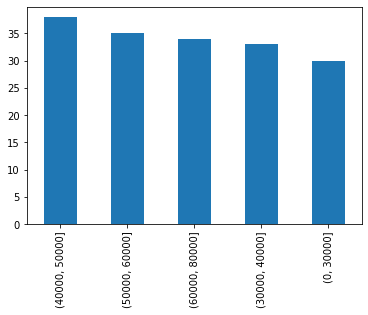

In [ ]:
#data['Price_range'] = pd.cut(data['Price'],bins=[0,30000,40000,50000,60000,80000])
#data['Price_range'].value_counts().plot(kind="bar")

<QueryDict: {'csrfmiddlewaretoken': ['zoxe0kwqYNjkdBlJq7gnwCuoB2hTTp0CnrC4uaQf7rQrueaz9cIgcd5NuL0HJN1g'], 'sort': ['Price_A'], 'Price_range': ['1,29999'], 'Brand': ['Any'], 'RAM': ['all', '8', '4'], 'Processor': ['all', 'Intel Core i5', 'Intel Core i3'], 'screen': ['all', 'Medium', 'Small'], 'Hard_disk': ['all', 'Solid State Drive', 'Hard Disk Drive']}>

In [ ]:
data1=data

In [ ]:
def get_advanced_df(data,brand,ub,lb,sort,Processor,RAM,screen,Hard_disk):
    table = pd.DataFrame(columns = data.columns)
    if ub==-1:
        table=data.loc[data['Price']>100000]
    elif lb>0 and ub>0:
        table=data.loc[(data['Price']>lb)&(data['Price']<=ub)]
    else:
        table=data
    del data
    if brand!='Any':
        table=table.loc[table['Brand']==brand]
    if sort=='Price_A':
        table=table.nsmallest(len(table),['Price'])
    elif sort=='Price_D':
        table=table.nlargest(len(table),['Price'])
    else:
        table=table.nlargest(len(table),[sort])
    if len(RAM)>1:
      RAM.remove('all')
      table=table.loc[table['RAM'].isin(RAM)]
    if len(Processor)>1:
      Processor.remove('all')
      table=table.loc[table['Processor'].isin(Processor)]
    if len(screen)>1:
      screen.remove('all')
      table=table.loc[table['Screen_size'].isin(screen)]
    if len(Hard_disk)>1:
      Hard_disk.remove('all')
      table=table.loc[table['Hard_drive'].isin(Hard_disk)]
    return table


In [ ]:
Processor=['all', 'Intel Core i5', 'Intel Core i3']
RAM=['all', '8', '4']
screen=['all', 'Medium', 'Small']
Hard_disk= ['all', 'Solid State Drive', 'Hard Disk Drive']
print(get_advanced_df(data,"Any",39999,1,"number of reveiws",Processor,RAM,screen,Hard_disk))

    Product_code  ...         Hard_drive
67    B08MQ7QKHJ  ...    Hard Disk Drive
86    B071X5CVWP  ...  Solid State Drive
15    B09DMRQ6XB  ...  Solid State Drive
42    B07ZD7CBLL  ...    Hard Disk Drive
132   B0916C2XM3  ...  Solid State Drive
38    B09D3B7NX9  ...  Solid State Drive
90    B09BCQCDF2  ...  Solid State Drive
75    B07LB4XRWC  ...    Hard Disk Drive
144   B09C8RD7BM  ...    Hard Disk Drive
185   B0979M4T4X  ...  Solid State Drive
17    B09G9ZVCKQ  ...  Solid State Drive
46    B09DL27QLK  ...    Hard Disk Drive
123   B09C2G5Z6D  ...  Solid State Drive
130   B09GPB1ZS8  ...    Hard Disk Drive
70    B07HR5Z6Y1  ...    Hard Disk Drive
182   B08TX1NHB8  ...  Solid State Drive
179   B09HMZHKQF  ...    Hard Disk Drive
93    B09HXK4BPB  ...    Hard Disk Drive
156   B09CDGQ4GS  ...    Hard Disk Drive
107   B09HXL97FM  ...    Hard Disk Drive
135   B09GVRXZVP  ...    Hard Disk Drive

[21 rows x 14 columns]


In [ ]:

"""
if len(RAM)>1:
  RAM.remove('all')
  data1=data1.loc[data1['RAM'].isin(RAM)]
if len(Processor)>1:
  Processor.remove('all')
  data1=data1.loc[data1['Processor'].isin(Processor)]
if len(screen)>1:
  screen.remove('all')
  data1=data1.loc[data1['Screen_size'].isin(screen)]
if len(Hard_disk)>1:
  Hard_disk.remove('all')
  data1=data1.loc[data1['Hard_drive'].isin(Hard_disk)]
print(data1)
"""

In [ ]:
def get_advanced_df(data,brand,ub,lb,sort,Processor,RAM,screen,Hard_disk):
    table = pd.DataFrame(columns = data.columns)
    if ub==-1:
        table=data.loc[data['Price']>100000]
    elif lb>0 and ub>0:
        table=data.loc[(data['Price']>lb)&(data['Price']<=ub)]
    else:
        table=data
    del data
    if brand!='Any':
        table=table.loc[table['Brand']==brand]
    if sort=='Price_A':
        table=table.nsmallest(len(table),['Price'])
    elif sort=='Price_D':
        table=table.nlargest(len(table),['Price'])
    else:
        table=table.nlargest(len(table),[sort])
    print('yo32')
    if len(RAM)>1:
      RAM.remove('all')
      table=table.loc[table['RAM'].isin(RAM)]
    if len(Processor)>1:
      Processor.remove('all')
      table=table.loc[table['Processor'].isin(Processor)]
    if len(screen)>1:
      screen.remove('all')
      table=table.loc[table['Screen_size'].isin(screen)]
    if len(Hard_disk)>1:
      Hard_disk.remove('all')
      table=table.loc[table['Hard_drive'].isin(Hard_disk)]
    return table
sort= 'number_of_reveiws'
Price_range= '0,0'
brand= 'Any' 
RAM=['all', '4']
Processor=['all', 'Intel Core i5']
screen= ['all', 'Small'] 
Hard_disk=['all', 'Hard Disk Drive']
ub=int(Price_range.split(',')[0])
lb=int(Price_range.split(',')[1])
table=get_advanced_df(data,brand,ub,lb,sort,Processor,RAM,screen,Hard_disk)

yo32
yo34


In [ ]:
table.head()

,Product_code,Product_name,Rating,number_of_reveiws,Price,Images,Link,Reveiw Link,details_file,Brand,Screen_size,RAM,Processor,Hard_drive
135,B09GVRXZVP,(Renewed) HP ProBook 640 G1 14-inch Laptop (Co...,3.0 out of 5 stars,1,26999,https://m.media-amazon.com/images/I/61Oa2SVfjW...,https://www.amazon.in/HP-640-Upgradable-Graphi...,https://www.amazon.in/HP-640-Upgradable-Graphi...,/content/gdrive/MyDrive/Amazon_product_Details...,HP,Small,4,Intel Core i5,Hard Disk Drive
70,B07HR5Z6Y1,(Renewed) Dell Latitude (2nd Gen Core i5/4GB R...,4.0 out of 5 stars,1,22999,https://m.media-amazon.com/images/I/51JU0LtYpD...,https://www.amazon.in/REFURBISHED-Dell-E6420-D...,NaN,/content/gdrive/MyDrive/Amazon_product_Details...,DELL,Small,4,Intel Core i5,Hard Disk Drive


In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Master_df.csv')
#code=request.GET['code']
code='B08T6SJ215'
data=data.drop(data.columns[0], axis=1)
det=data.loc[data['Product_code']==code]
del data
det.rename(columns = {'Reveiw Link':'Review_link','number_of_reveiws':'number_of_reviews'}, inplace = True)
try:
    det['rev_rat_dist']=det['rev_rat_dist'].apply(lambda x: x.split(' '))
    det['rev_tone_dist']=det['rev_tone_dist'].apply(lambda x: x.split(' '))
    if len(det['rev_tone_dist'].iloc[0])<3:
      
    det.iat[0,-2]=[int(ele) for ele in det.iloc[0]['rev_rat_dist']]
    det.iat[0,-1]=[int(ele) for ele in det.iloc[0]['rev_tone_dist']]
except:
    det['rev_tone_dist']=None
    det['rev_rat_dist']=None
#det=dict(det.iloc[0])

In [ ]:
det.iat[0,-1]=[int(ele) for ele in det.iloc[0]['rev_tone_dist']].append(0)

3


In [19]:
import urllib.request
import pandas as pd
link="https://raw.githubusercontent.com/DibyaSadhukhan/Amazon_Review_Analysis/main/Data/Details/"
response = urllib.request.urlopen(link+"B01GVVMIPG.txt")
Text = response.read()
Text = Text.decode("utf-8")
Text=Text.split('||')
th=[]
td=[]
for det in Text:
  th.append(''.join(det.split(':')[0]).strip('\u200e'))
  td.append(' '.join(det.split(':')[1:]).strip('\u200e'))
df = pd.DataFrame({"th":th,"td":td})
del th
del td
table=[]
for i in range(df.shape[0]):
  table.append(dict(df.iloc[i]))
print(df.iloc[:])

                                th                                            td
0                            Brand                                            HP
1                     Manufacturer                                            hp
2                           Series                               EliteBook 8460P
3                           Colour                                        Silver
4                      Form Factor                                      Notebook
5                      Item Height                                   1.25 Inches
6                       Item Width                                  13.31 Inches
7     Standing screen display size                                     14 Inches
8                Screen Resolution                                      1366x768
9                       Resolution                                      1366x768
10              Product Dimensions       23.14 x 33.81 x 3.18 cm; 2.09 Kilograms
11                       Bat